In [25]:
# Stock price prediction model



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
plt.style.use('fivethirtyeight')

In [30]:
# stock
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2021-03-27')

In [31]:
print(df)
# the data

                  High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2021-03-22  123.870003  120.260002  120.330002  123.389999  111912300.0   
2021-03-23  124.239998  122.139999  123.330002  122.540001   95467100.0   
2021-03-24  122.900002  120.070000  122.820000  120.089996   88530500.0   
2021-03-25  121.660004  119.000000  119.540001  120.589996   98844700.0   
2021-03-26  121.480003  118.919998  120.349998  121.209999   93958900.0   

             Adj Close  

In [32]:
# number of rows and columns

df.shape

(2323, 6)

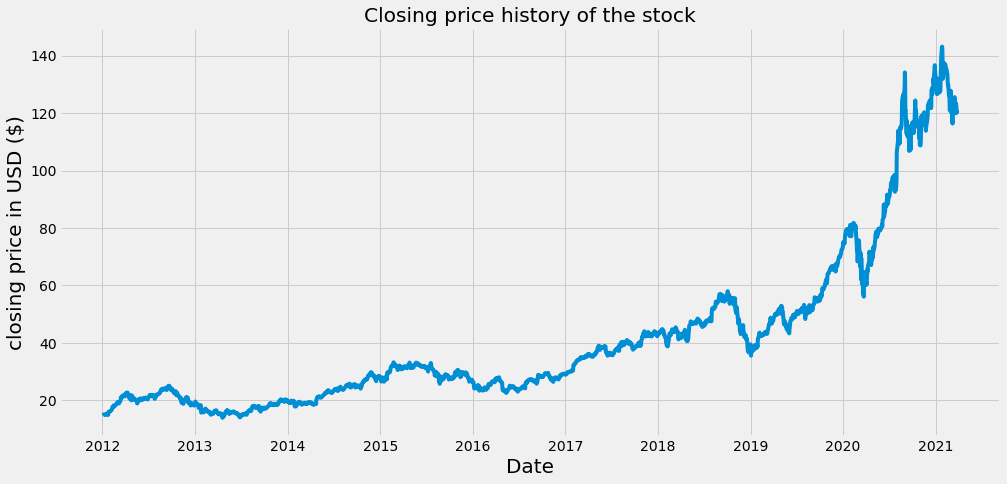

In [33]:
# Looking for the closing price of the stock

plt.figure(figsize=(15,7))
plt.title('Closing price history of the stock')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('closing price in USD ($)', fontsize=20)
plt.show()

In [34]:
# create a new dataframe with only the close column
data = df.filter(['Close'])

# convert the dataframe to a numpy array
dataset = data.values

# number of rows to train the data
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1859

In [35]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.82145685],
       [0.82532645],
       [0.83012476]])

In [36]:
# Create the (scaled) training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into xtrain and ytrain

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()


[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]



In [37]:
# converting the x_train and y_train to numpy arrays so that we can use them in the LSTM model

x_train, y_train = np.array(x_train), np.array(y_train)

In [38]:
# reshaping the data for the convinience of the LSTM as it expects data to be in three dimensional

x_train.shape

(1799, 60)

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1799, 60, 1)

In [40]:
# Building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [41]:
# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# Training the model

model.fit(x_train, y_train, batch_size=1,epochs=1)

Epoch 1/1
1799/1799 [==============================] - 127s 71ms/step - loss: 3.1627e-04


In [43]:
# creating the test dataset

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [44]:
# convert the data to numpy array

x_test = np.array(x_test)

In [45]:
# reshape the data

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [46]:
# getting the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [47]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

3.7901393835660455


C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


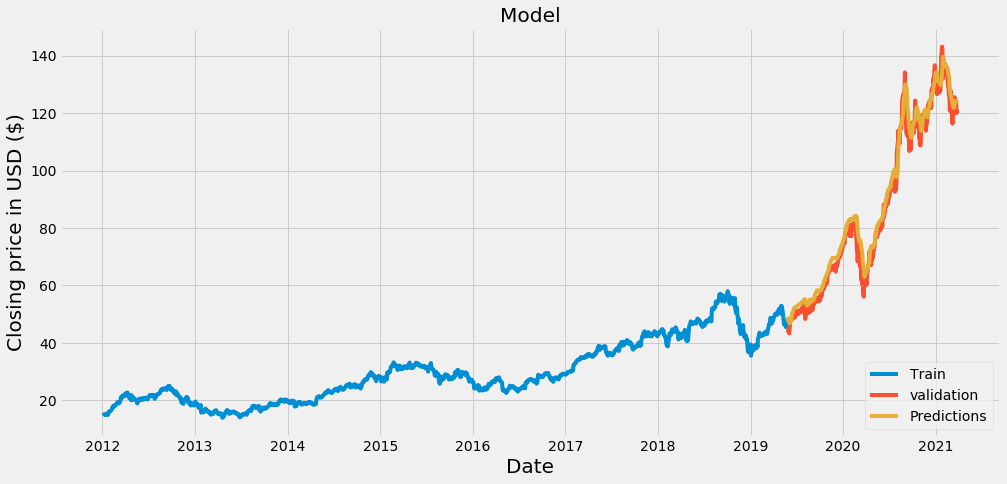

In [48]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data

plt.figure(figsize=(15,7))
plt.title('Model')
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Closing price in USD ($)', fontsize= 20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','validation','Predictions'], loc='lower right')
plt.show()

In [49]:
print(valid)

                 Close  Predictions
Date                               
2019-05-24   44.742500    48.928520
2019-05-28   44.557499    48.501106
2019-05-29   44.345001    48.101856
2019-05-30   44.575001    47.738384
2019-05-31   43.767502    47.462246
...                ...          ...
2021-03-22  123.389999   124.127686
2021-03-23  122.540001   124.164169
2021-03-24  120.089996   124.174545
2021-03-25  120.589996   123.875801
2021-03-26  121.209999   123.529732

[464 rows x 2 columns]


In [58]:
apple = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2021-03-26')
# create new dataframe
df1 = apple.filter(['Close'])
# getting the last 60 day closing price values
last_60_days = df1[-60:].values
#scale the data to 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create empty list
X_test = []
# append the past 60 days
X_test.append(last_60_days_scaled)
# convert the X_test to numpy array
X_test = np.array(X_test)
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
# predicted scaled price
pred_price = model.predict(X_test)
# remove scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[123.26526]]


In [59]:
apple_2 = web.DataReader('AAPL', data_source='yahoo',start='2021-03-27',end='2021-03-27')
print(apple_2['Close'])

Date
2021-03-26    121.209999
Name: Close, dtype: float64


In [61]:
apple_3 = web.DataReader('AAPL', data_source='yahoo',start='2021-03-29',end='2021-03-29')
print(apple_3['Close'])

Date
2021-03-29    121.389999
Name: Close, dtype: float64
